In [201]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skimage
import numpy as np
from PIL import Image 
from skimage import io

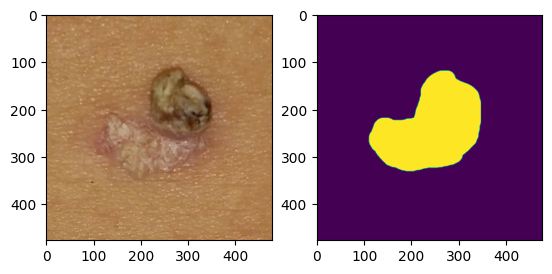

In [386]:
rgb_img = plt.imread("mdasm-2024\pictures\PAT_414_822_420.png")[:,:,:3]
mask = plt.imread("mdasm-2024\groupR_masks\PAT_414_822_420_mask.png")
f, axarr = plt.subplots(1,2)
axarr[0].imshow(rgb_img)
axarr[1].imshow(mask)


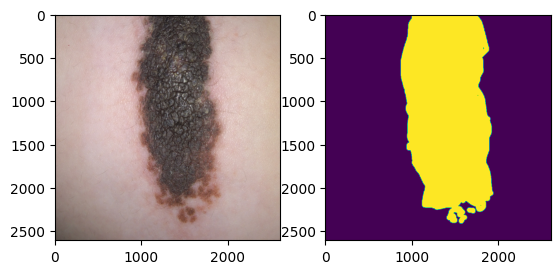

In [325]:
rgb_img = plt.imread("mdasm-2024\pictures\PAT_471_909_344.png")[:,:,:3]
mask = plt.imread("mdasm-2024\groupR_masks\PAT_471_909_344_mask.png")
f, axarr = plt.subplots(1,2)
axarr[0].imshow(rgb_img)
axarr[1].imshow(mask)



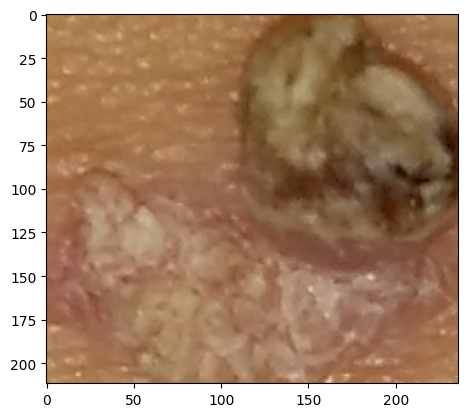

In [387]:
lesion_coords = np.where(mask != 0)
min_x = min(lesion_coords[0])
max_x = max(lesion_coords[0])
min_y = min(lesion_coords[1])
max_y = max(lesion_coords[1])
cropped_lesion = rgb_img[min_x:max_x,min_y:max_y]
image_shape=cropped_lesion.shape[:2]
plt.imshow(cropped_lesion)


In [336]:
reshape=cropped_lesion.reshape(-1,3)
reshape.shape

(50032, 3)

In [337]:
k_clust=KMeans(n_clusters=2)
k_clust.fit(reshape)
segmentation_labels=k_clust.labels_

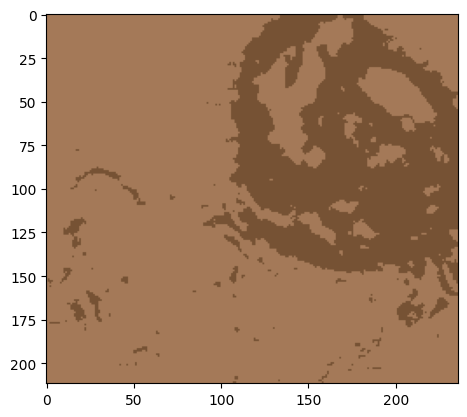

In [338]:
seg_img=k_clust.cluster_centers_[segmentation_labels]
my_result=seg_img.reshape(cropped_lesion.shape)
#plt.imshow(my_result)
plt.imshow(my_result)

[1 1 1 ... 1 1 1]


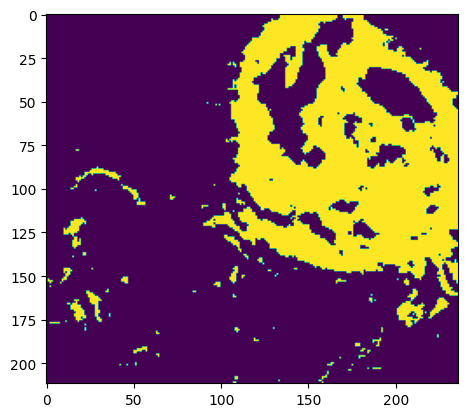

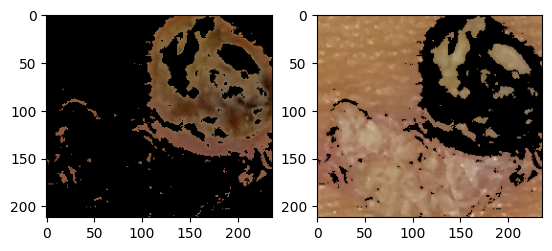

In [339]:
a=k_clust.cluster_centers_[segmentation_labels]
print(segmentation_labels)
a=a.reshape(cropped_lesion.shape)
label_image = segmentation_labels.reshape(cropped_lesion.shape[:2])
plt.imshow(label_image==0)
cluster_image_1 = np.zeros_like(cropped_lesion)
cluster_image_2 = np.zeros_like(cropped_lesion)
#cl1= cropped_lesion[label_image==0]
cluster_image_1[label_image == 0] = cropped_lesion[label_image == 0]
cluster_image_2[label_image == 1] = cropped_lesion[label_image == 1]
#cl2 = cropped_lesion[label_image == 1]

f, axarr = plt.subplots(1,2)
axarr[0].imshow(cluster_image_1)
axarr[1].imshow(cluster_image_2)


13563.128
48450.0


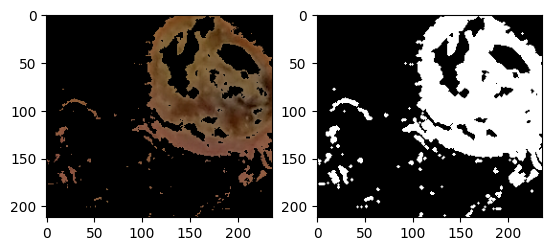

In [340]:
from skimage import morphology

# Use this "brush" to erode the image - eat away at the borders
cl1_dilated=np.zeros_like(cropped_lesion)
dilate = morphology.binary_dilation(cluster_image_1, out=cl1_dilated, mode='min')

f, axarr = plt.subplots(1,2)
axarr[0].imshow(cluster_image_1)
axarr[1].imshow(cl1_dilated)

print(np.sum(cluster_image_1))
print(np.sum(cl1_dilated))

In [341]:
overlapping_area = np.sum(cropped_lesion * cluster_image_1)
nonoverlapping_area = np.sum(cropped_lesion)-np.sum(cluster_image_1)
score =  overlapping_area/nonoverlapping_area
print(score)

0.09608715


1
Score: 0.52165544 17635.68 33807.14


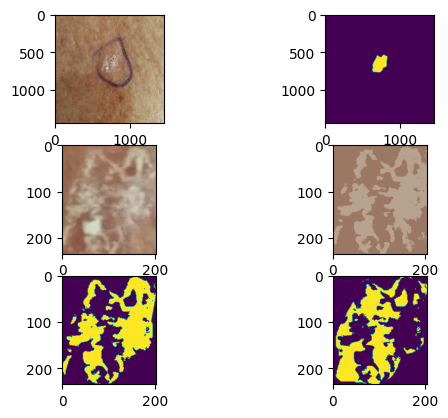

In [384]:
rgb_img = plt.imread("mdasm-2024\pictures\PAT_1429_1491_451.png")[:,:,:3]
mask = plt.imread("mdasm-2024\groupR_masks\PAT_1429_1491_451_mask.png")
f, axarr = plt.subplots(3,2)
axarr[0,0].imshow(rgb_img)
axarr[0,1].imshow(mask)

lesion_coords = np.where(mask != 0)
min_x = min(lesion_coords[0])
max_x = max(lesion_coords[0])
min_y = min(lesion_coords[1])
max_y = max(lesion_coords[1])
cropped_lesion = rgb_img[min_x:max_x,min_y:max_y]
cropped_lesion_mask=mask[min_x:max_x,min_y:max_y]
image_shape=cropped_lesion.shape[:2]
axarr[1,0].imshow(cropped_lesion)

reshape=cropped_lesion.reshape(-1,3)
reshape.shape

k_clust=KMeans(n_clusters=2)
k_clust.fit(reshape)
segmentation_labels=k_clust.labels_

seg_img=k_clust.cluster_centers_[segmentation_labels]
my_result=seg_img.reshape(cropped_lesion.shape)
#plt.imshow(my_result)
axarr[1,1].imshow(my_result)

label_image = segmentation_labels.reshape(cropped_lesion_mask.shape[:2])
plt.imshow(label_image==0)
cluster_image_1 = np.zeros_like(cropped_lesion_mask)
cluster_image_2 = np.zeros_like(cropped_lesion_mask)
#cl1= cropped_lesion[label_image==0]
cluster_image_1[label_image == 0] = cropped_lesion_mask[label_image == 0]
cluster_image_2[label_image == 1] = cropped_lesion_mask[label_image == 1]
#cl2 = cropped_lesion[label_image == 1]


axarr[2,0].imshow(cluster_image_1)
axarr[2,1].imshow(cluster_image_2)

area_cl1=np.sum(cluster_image_1)
area_cl2=np.sum(cluster_image_2)
if area_cl1>area_cl2:
    print(1)
    major_cl=cluster_image_1
    overlapping_area = np.sum(cropped_lesion_mask * major_cl)

else:
    print(2)
    major_cl=cluster_image_2
    overlapping_area = np.sum(cropped_lesion_mask * major_cl)

score =  overlapping_area/ np.sum(cropped_lesion_mask)
print('Score:',score, overlapping_area, np.sum(cropped_lesion_mask))